# EDA

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tmdb = pd.read_csv("Data/tmdb_results_combined.csv.gz")

In [3]:
# Filtering out movies with revenue and a budget above 0
df_r_b = (tmdb["revenue"] > 0) & (tmdb["budget"] > 0)
tmdb = tmdb[df_r_b]
df_r_b.value_counts()

False    2216
True      355
dtype: int64

In [4]:
movies_rev = tmdb.groupby("title")["revenue"].sum()
movies_rev

title
102 Dalmatians            183611771.0
15 Minutes                 56359980.0
2001: A Space Travesty       270813.0
28 Days                     6219894.0
3 Strikes                   9000000.0
                             ...     
X-Men                     296339527.0
Xchange                     5000000.0
Y Tu Mamá También          33616692.0
Yamakasi                    1297401.0
Zoolander                  60780981.0
Name: revenue, Length: 355, dtype: float64

In [5]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 4 to 2519
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                355 non-null    object 
 1   adult                  355 non-null    float64
 2   backdrop_path          348 non-null    object 
 3   belongs_to_collection  88 non-null     object 
 4   budget                 355 non-null    float64
 5   genres                 355 non-null    object 
 6   homepage               51 non-null     object 
 7   id                     355 non-null    float64
 8   original_language      355 non-null    object 
 9   original_title         355 non-null    object 
 10  overview               355 non-null    object 
 11  popularity             355 non-null    float64
 12  poster_path            355 non-null    object 
 13  production_companies   355 non-null    object 
 14  production_countries   355 non-null    object 
 15  relea

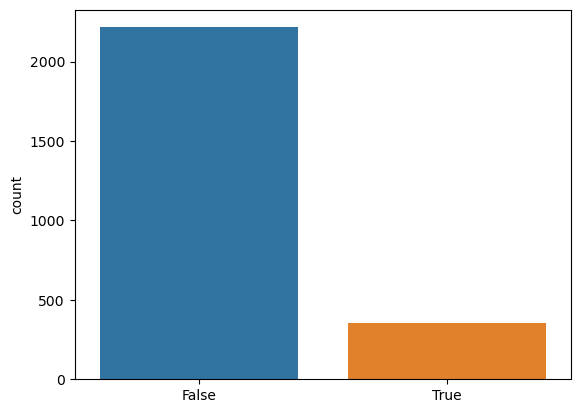

In [6]:
# How many movies had at least some valid financial information
ax = sns.countplot(x=df_r_b)

In [7]:
tmdb["certification"].value_counts()

R        143
PG-13    117
PG        30
G         13
NR         7
Name: certification, dtype: int64

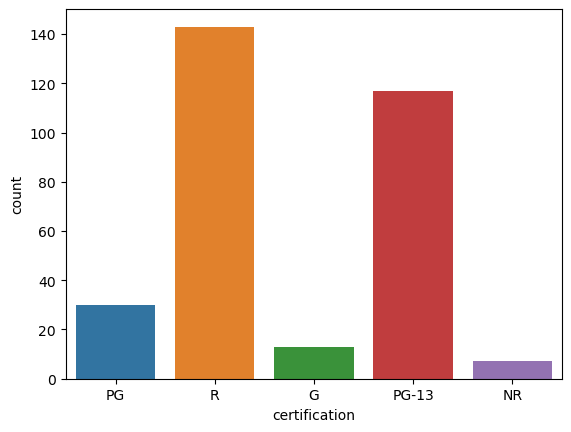

In [9]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)?
ax = sns.countplot(data = tmdb, x= "certification");

In [10]:
# What is the average revenue per certification category?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
avg_rev = tmdb.groupby("certification")["revenue"].mean()

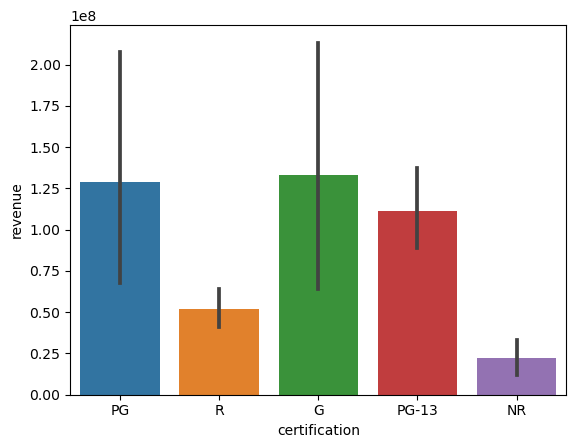

In [11]:
sns.barplot(data=tmdb, x = "certification", y= "revenue" );

In [12]:
# What is the average budget per certification category?
avg_bud = tmdb.groupby("certification")["budget"].mean()
avg_bud

certification
G       44000000.00
NR      13528571.43
PG      51974907.80
PG-13   46627328.09
R       26724573.78
Name: budget, dtype: float64

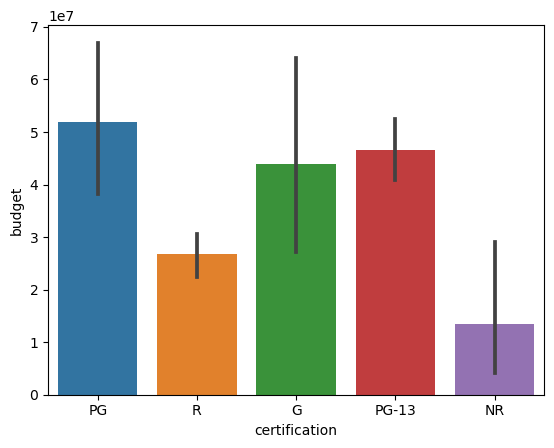

In [13]:
sns.barplot(data=tmdb, x = "certification", y= "budget" );